In [3]:
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import tensorflow as tf

In [8]:
PATH_IMAGEN = Path("../Imagenes/fps1.png")  #Prueba1
if not PATH_IMAGEN.exists():
    print("La imagen {} no existe".format(PATH_IMAGEN))

In [9]:
IMG = mpimg.imread(PATH_IMAGEN)
print(type(IMG))

<class 'numpy.ndarray'>


In [10]:
#Dirección del modelo
PATH_MODEL = Path('../ssd_mobilenet_v1_coco_2017_11_17/saved_model/')
if not PATH_MODEL.is_dir():
    print("La carpeta del modelo {} no existe".format(PATH_MODEL))

In [11]:
def cargar_modelo(path_modelo):
    model = tf.saved_model.load(str(path_modelo))
    model = model.signatures['serving_default']  
    return model

In [12]:
        #= img2[y1:y2, x1,x2]
crop_img = img2[40:150, 200:400]

NameError: name 'img2' is not defined

In [13]:
MODEL_DETECTION = cargar_modelo(PATH_MODEL) # Cargar el modelo de detección

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [14]:
def inferir_imagen(modelo, img_Inicial):
    
    img_array = np.asarray(img_Inicial) # Convertir la imagen en arreglo
    
    # La entrada debe ser un tensor, convertirlo usando 'tf.convert_to_tensor'
    input_tensor = tf.convert_to_tensor(img_array)
    
    # El modelo espera las imagenes, asi que se agrega un eje con 'tf.newaxis'
    input_tensor = input_tensor[tf.newaxis,...]
    
    # Enviar el tensor de la imagen al modelo ~ ejecutar la inferencia
    output_dict = modelo(input_tensor)
    
    num_detections = int(output_dict.pop('num_detections'))
    num_detections = 10  #Reducir el total de detecciones 
    
    clases_detectadas = []
    coord_finales = []
    
    for key in output_dict['detection_classes']:
        clases_detectadas = key[0:num_detections].numpy()
        # Seleccionar las clases que pertenecen a un carro(3) o una camioneta(8)
        clases_detectadas = np.where( (clases_detectadas == 3) | (clases_detectadas == 8) )
        
    #Almacena los scores obtenidos en un numpy array
    detected_scores = output_dict['detection_scores'][0].numpy()
    detected_boxes = output_dict['detection_boxes'][0].numpy()
    
    for key in clases_detectadas[0]:
        if detected_scores[key] > float(0.45):       
            coord_finales.append(detected_boxes[key]) # Almacenar las coordenadas con un score mayor a 45%
        
    return coord_finales

In [15]:
def conversion_Coordenadas(arr_coor,img_ancho,img_alto):
    #[(248,84),(248,139),(396,139),(396,84),(248,84)]
    (left, right, top, bottom) = (arr_coor[1] * img_ancho, arr_coor[3] * img_ancho,
                                  arr_coor[0] * img_alto, arr_coor[2] * img_alto)

    return [(left, top), (left, bottom), (right, bottom), (right, top), (left, top)]

In [16]:
cvIMG = cv.imread(str(PATH_IMAGEN))
img2 = cv.cvtColor(cvIMG, cv.COLOR_BGR2RGB)

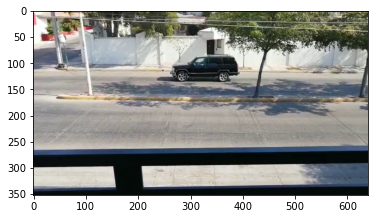

In [17]:
plt.imshow(img2)
plt.show()

In [20]:
img2.shape[:2]

(352, 640)

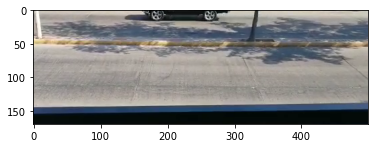

In [31]:
        #= img2[y1:y2, x1,x2]
crop_img = img2[120:290, 100:600]
plt.imshow(crop_img)
plt.show()

In [125]:
crop_img.shape[1]

190

In [126]:
coordenadas_detectadas = inferir_imagen(MODEL_DETECTION,crop_img)

nCoord = []
for coordenada in coordenadas_detectadas:
    nCoord = conversion_Coordenadas(coordenada,crop_img.shape[1],crop_img.shape[0])

In [127]:
crop_img = cv.rectangle(crop_img,(int(nCoord[0][0]),int(nCoord[0][1])), (int(nCoord[2][0]),int(nCoord[2][1])), (100,10,100), 2) 

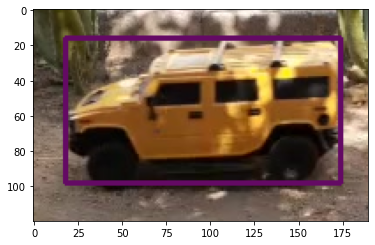

In [128]:
plt.imshow(crop_img)
plt.show()

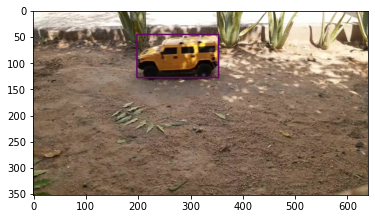

In [129]:
img2[30:150, 180:370] = crop_img
plt.imshow(img2)
plt.show()